In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


In [2]:
# Load raw data
df = pd.read_csv('../data/raw/crop_yield_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()


Dataset shape: (2660, 15)

Columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,144,Sri Lanka,5312,Area harvested,01929.07,"Abaca, manila hemp, raw",2019,2019,NaN,NaN,NaN,NaN,NaN
1,QCL,Crops and livestock products,144,Sri Lanka,5412,Yield,01929.07,"Abaca, manila hemp, raw",2019,2019,NaN,NaN,NaN,NaN,NaN
2,QCL,Crops and livestock products,144,Sri Lanka,5510,Production,01929.07,"Abaca, manila hemp, raw",2019,2019,NaN,NaN,NaN,NaN,NaN
3,QCL,Crops and livestock products,144,Sri Lanka,5312,Area harvested,01929.07,"Abaca, manila hemp, raw",2020,2020,NaN,NaN,NaN,NaN,NaN
4,QCL,Crops and livestock products,144,Sri Lanka,5412,Yield,01929.07,"Abaca, manila hemp, raw",2020,2020,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filter for Yield data
df_yield = df[df['Element'] == 'Yield'].copy()
df_yield = df_yield[df_yield['Value'].notna()].copy()
df_yield = df_yield[['Area', 'Item', 'Year', 'Value']].copy()
df_yield.columns = ['district', 'crop', 'year', 'yield']

print(f"Yield data shape: {df_yield.shape}")
print(f"\nNumber of unique crops: {df_yield['crop'].nunique()}")
print(f"Years: {sorted(df_yield['year'].unique())}")
df_yield.head()


Yield data shape: (255, 4)

Number of unique crops: 51
Years: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


,district,crop,year,yield
91,Sri Lanka,Areca nuts,2019,2935.4
94,Sri Lanka,Areca nuts,2020,3514.2
97,Sri Lanka,Areca nuts,2021,4636.1
100,Sri Lanka,Areca nuts,2022,3522.9
103,Sri Lanka,Areca nuts,2023,3966.3


In [4]:
# Basic statistics
print("Basic Statistics:")
print(df_yield.describe())

print("\nMissing values:")
print(df_yield.isnull().sum())


Basic Statistics:
              year         yield
count   255.000000    255.000000
mean   2021.000000   8003.226667
std       1.416995   9082.634135
min    2019.000000    511.600000
25%    2020.000000   1353.150000
50%    2021.000000   5898.300000
75%    2022.000000  11941.150000
max    2023.000000  59265.000000

Missing values:
district    0
crop        0
year        0
yield       0
dtype: int64


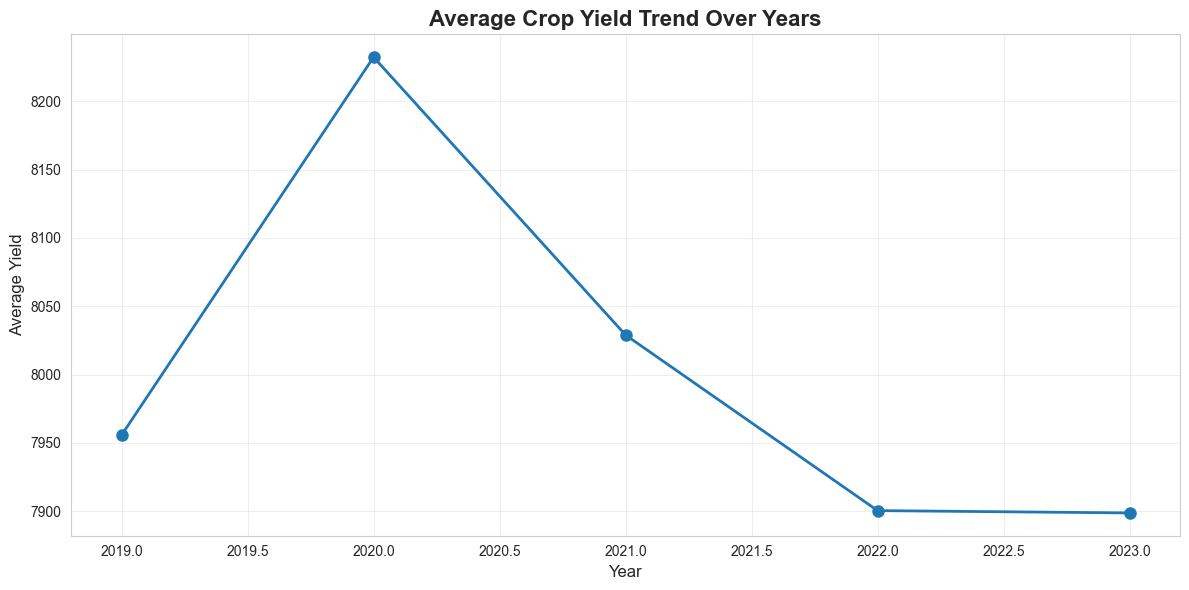

In [5]:
# Average yield by year
yearly_avg = df_yield.groupby('year')['yield'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['yield'], marker='o', linewidth=2, markersize=8)
plt.title('Average Crop Yield Trend Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Yield', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/yearly_yield_trend.png', dpi=300, bbox_inches='tight')
plt.show()


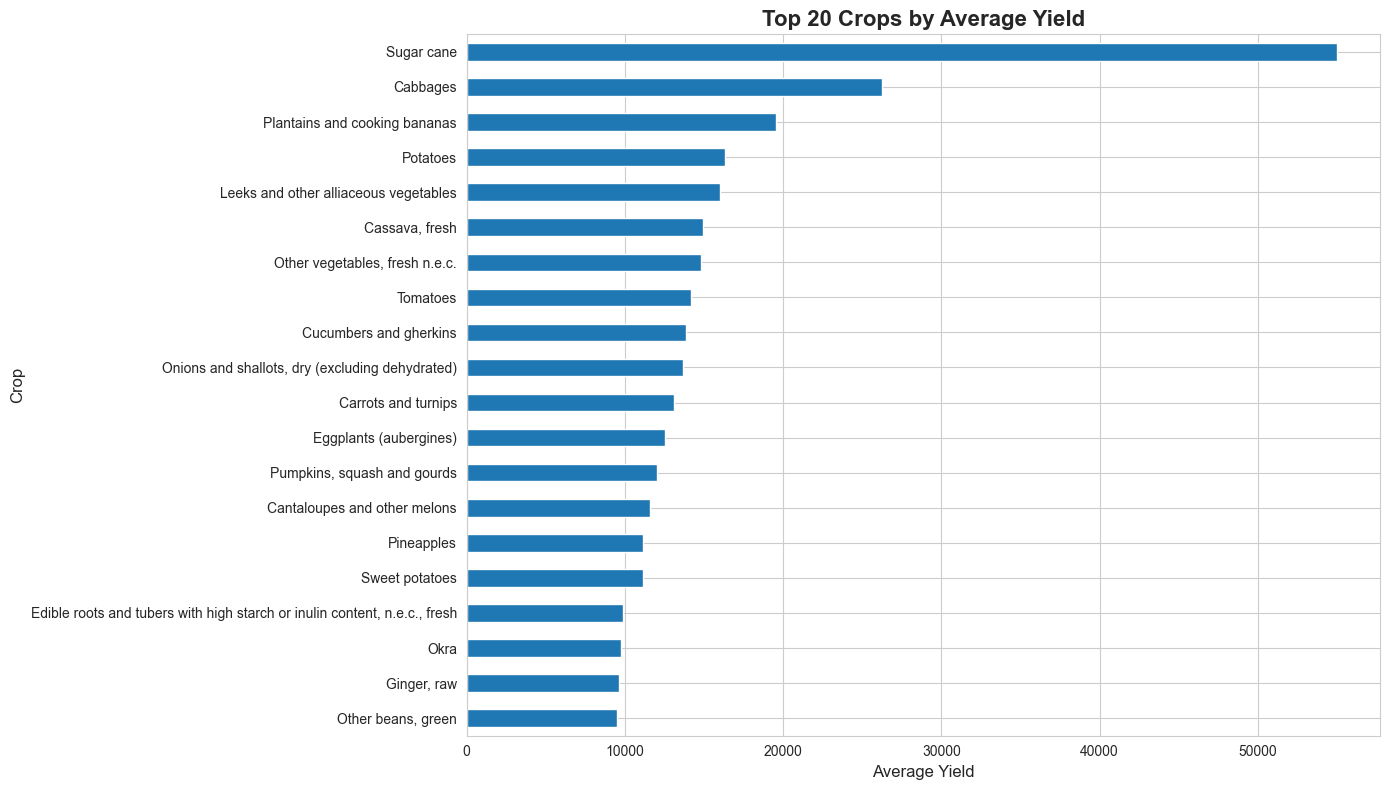

In [6]:
# Top 20 crops by average yield
top_crops = df_yield.groupby('crop')['yield'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))
top_crops.plot(kind='barh')
plt.title('Top 20 Crops by Average Yield', fontsize=16, fontweight='bold')
plt.xlabel('Average Yield', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../images/top_crops_yield.png', dpi=300, bbox_inches='tight')
plt.show()


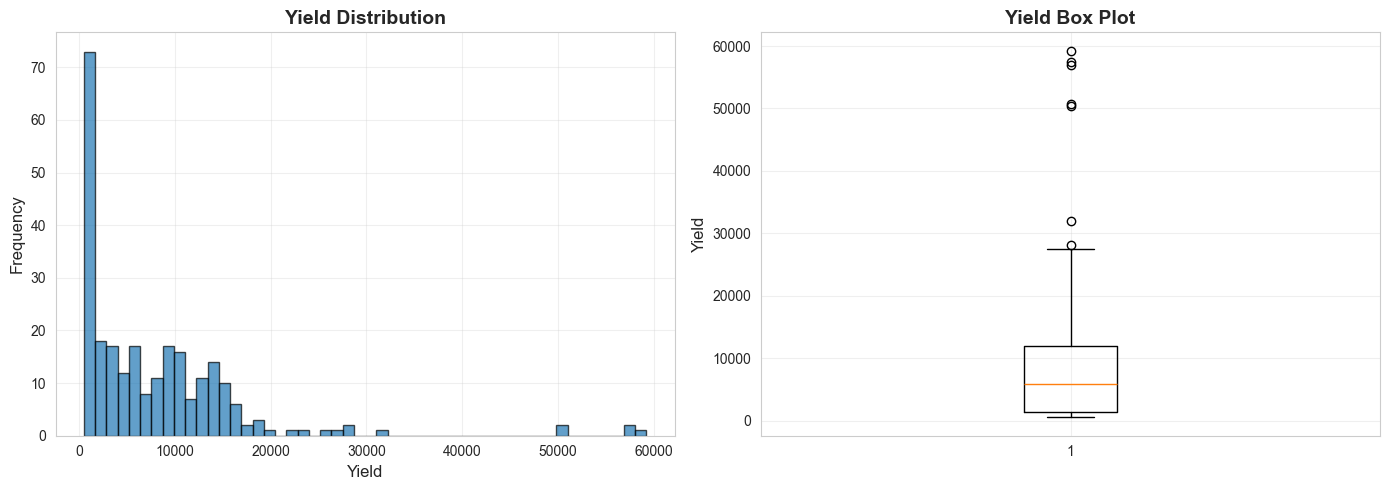

In [7]:
# Yield distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_yield['yield'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Yield Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Yield', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_yield['yield'])
axes[1].set_title('Yield Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Yield', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/yield_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


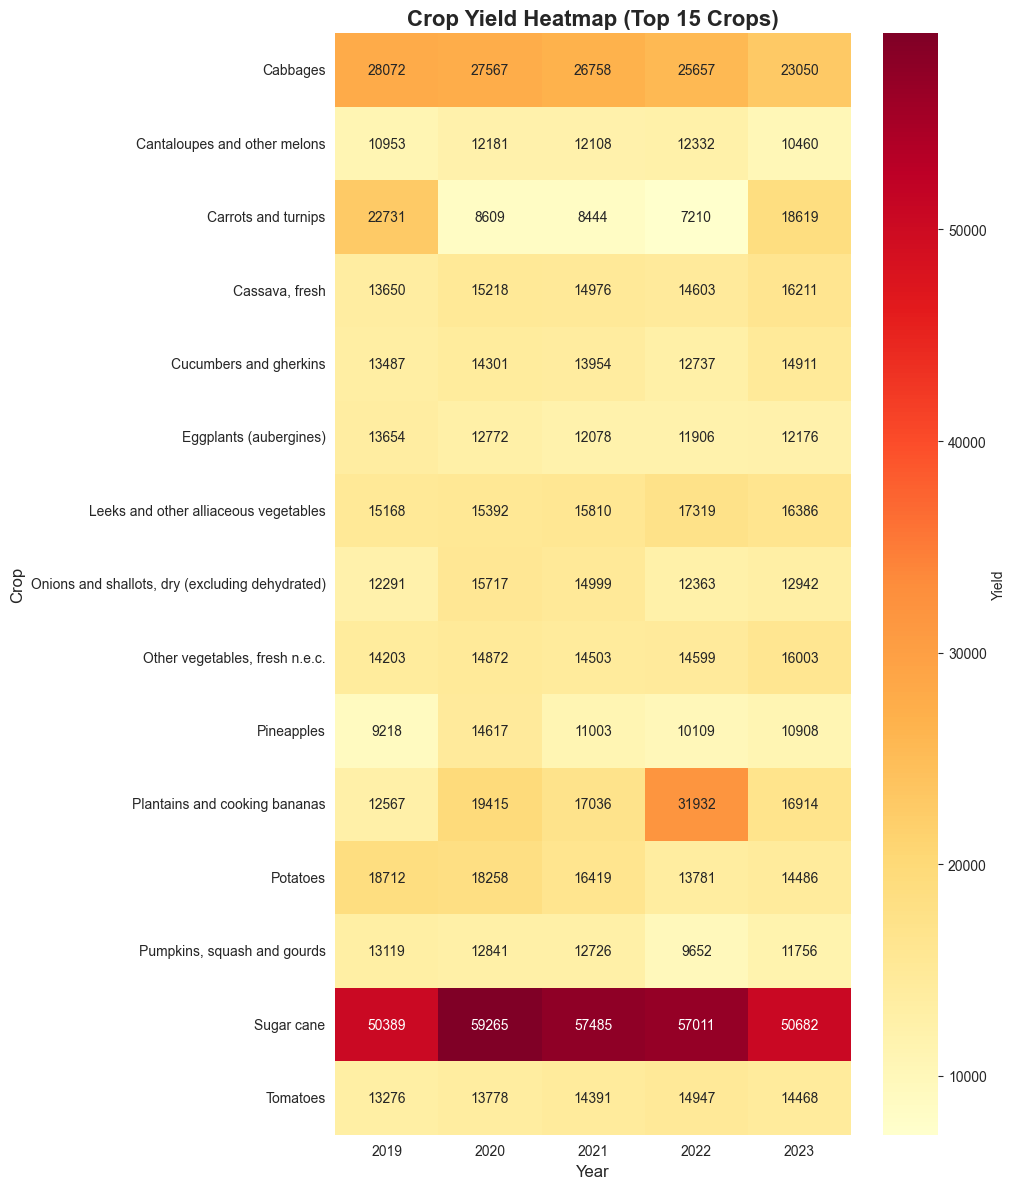

In [8]:
# Select top 15 crops for heatmap
top_15_crops = df_yield.groupby('crop')['yield'].mean().nlargest(15).index
df_top = df_yield[df_yield['crop'].isin(top_15_crops)]

# Create pivot table
pivot_data = df_top.pivot_table(values='yield', index='crop', columns='year', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Yield'})
plt.title('Crop Yield Heatmap (Top 15 Crops)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.tight_layout()
plt.savefig('../images/yield_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
